# 2.3: Classical confidence intervals

In [56]:
from __future__ import print_function, division
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## CI for continuous data, Pg 18

In [57]:
# import the t-distribution from scipy.stats
from scipy.stats import t

In [58]:
#R: y <- c(35,34,38,35,37)
y = np.array([35,34,38,35,37])
y

array([35, 34, 38, 35, 37])

In [59]:
#R: n <- length(y)
n = len(y)
n

5

In [60]:
#R: estimate <- mean(y)
estimate = np.mean(y)
estimate

35.799999999999997

Numpy uses a denominator of **N** in the standard deviation calculation by
default, instead of **N-1**. To use **N-1**, the unbiased estimator-- and to
agree with the R output, we have to give `np.std()` the argument `ddof=1`:

In [61]:
#R: se <- sd(y)/sqrt(n)
se = np.std(y, ddof=1)/np.sqrt(n)
se

0.73484692283495334

In [62]:
#R: int.50 <- estimate + qt(c(.25,.75),n-1)*se
int50 = estimate + t.ppf([0.25, 0.75], n-1)*se
int50

array([ 35.25570103,  36.34429897])

In [63]:
#R: int.95 <- estimate + qt(c(.025,.975),n-1)*se
int95 = estimate + t.ppf([0.025, 0.975], n-1)*se
int95

array([ 33.75973786,  37.84026214])

## CI for proportions, Pg 18

In [64]:
# import the normal from scipy.stats
from scipy.stats import norm

In [65]:
#R: y <- 700
y = 700
y

700

In [66]:
#R: n <- 1000
n = 1000
n

1000

In [67]:
#R: estimate <- y/n
estimate = y/n
estimate

0.7

In [68]:
#R: se <- sqrt (estimate*(1-estimate)/n)
se = np.sqrt(estimate*(1-estimate)/n)
se

0.014491376746189439

In [69]:
#R: int.95 <- estimate + qnorm(c(.025,.975))*se
int95 = estimate + norm.ppf([.025,0.975])*se
int95

array([ 0.67159742,  0.72840258])

## CI for discrete data, Pg 18

In [70]:
#R: y <- rep(c(0,1,2,3,4), c(600,300,50,30,20))
y = np.repeat([0,1,2,3,4], [600,300, 50, 30, 20])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [71]:
#R: n <- length(y)
n = len(y)
n

1000

In [72]:
#R: estimate <- mean(y)
estimate = np.mean(y)
estimate

0.56999999999999995

See the note above about the difference different defaults for standard
deviation in Python and R.

In [73]:
#R: se <- sd(y)/sqrt(n)
se = np.std(y, ddof=1)/np.sqrt(n)
se

0.027674281668470926

In [74]:
#R: int.50 <- estimate + qt(c(.25,.75),n-1)*se
int50 = estimate + t.ppf([0.25, 0.75], n-1)*se
int50

array([ 0.55132718,  0.58867282])

In [75]:
#R: int.95 <- estimate + qt(c(.025,.975),n-1)*se
int95 = estimate + t.ppf([0.025, 0.975], n-1)*se
int95

array([ 0.51569361,  0.62430639])

## Plot Figure 2.3, Pg 19

In [76]:
#R: par(mar=c(5,5,4,2)+.1)

The **polls.dat** file has an unsual format--

In [77]:
%%bash
head ../../ARM_Data/death.polls/polls.dat

2002 10
 70
 25
 05
2002 5
 72
 25
 03
2001 10
 68


In [78]:
# Data is available in death.polls directory of ARM_Data
# R: polls <- matrix(scan("../../ARM_Data/death.polls/polls.dat"),
#                    ncol=5, byrow=TRUE)
data = []
temp = []
ncols = 5
with open("../../ARM_Data/death.polls/polls.dat") as f:
    for line in f.readlines():
        for d in line.strip().split(' '):
            temp.append(float(d))
        if (len(temp) == ncols):
            data.append(temp)
            temp = []

polls = pd.DataFrame(data, columns=[u'year', u'month', u'for', u'against', u'unknown'])
polls.head()

,year,month,for,against,unknown
0,2002,10,70,25,5
1,2002,5,72,25,3
2,2001,10,68,26,6
3,2001,5,65,27,8
4,2001,2,67,25,8


In [79]:
#R: support <- polls[,3]/(polls[,3]+polls[,4])
polls[u'support'] = polls[u'for']/(polls[u'for']+polls[u'against'])
polls.head()

,year,month,for,against,unknown,support
0,2002,10,70,25,5,0.736842
1,2002,5,72,25,3,0.742268
2,2001,10,68,26,6,0.723404
3,2001,5,65,27,8,0.706522
4,2001,2,67,25,8,0.728261


In [80]:
#R: year <-  polls[,1] + (polls[,2]-6)/12
polls[u'year_float'] = polls[u'year'] + (polls[u'month']-6)/12
polls.head()

,year,month,for,against,unknown,support,year_float
0,2002,10,70,25,5,0.736842,2002.333333
1,2002,5,72,25,3,0.742268,2001.916667
2,2001,10,68,26,6,0.723404,2001.333333
3,2001,5,65,27,8,0.706522,2000.916667
4,2001,2,67,25,8,0.728261,2000.666667


In [97]:
# add error column -- symmetric so only add one column
# assumes sample size -- why?? Isn't it 100??
polls[u'support_error'] = np.sqrt(polls[u'support']*(1-polls[u'support'])/1000)
polls.head()

,year,month,for,against,unknown,support,year_float,support_error
0,2002,10,70,25,5,0.736842,2002.333333,0.013925
1,2002,5,72,25,3,0.742268,2001.916667,0.013831
2,2001,10,68,26,6,0.723404,2001.333333,0.014145
3,2001,5,65,27,8,0.706522,2000.916667,0.014400
4,2001,2,67,25,8,0.728261,2000.666667,0.014068


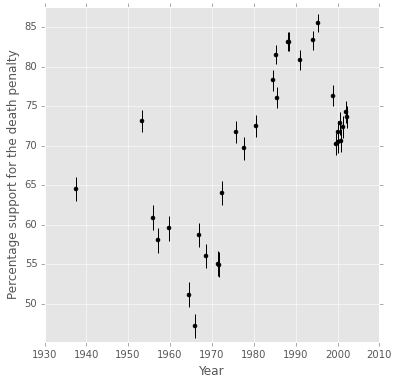

In [111]:
#R: plot(year, support*100, xlab="Year", ylim=c(min(100*support)-1, max(100*support)+1),
#        ylab="Percentage support for the death penalty", cex=1.1, cex.main=1.2,
#        cex.axis=1.1, cex.lab=1.1, pch=20)
#   
#   for (i in 1:nrow(polls))
#     lines (rep(year[i],2), 100*(support[i]+c(-1,1)*sqrt(support[i]*(1-support[i])/1000)))
plt.style.use('ggplot')
plt.errorbar(polls[u'year_float'], 100*polls[u'support'],
             yerr=100*polls[u'support_error'], fmt='ko',
             ms=4, capsize=0)
plt.ylim(np.min(100*polls[u'support'])-2, np.max(100*polls[u'support']+2))
plt.ylabel(u'Percentage support for the death penalty')
plt.xlabel(u'Year')

fig = plt.gcf()
fig.set_size_inches(6,6)